<h2> Predicting Employee Attrition Using Classification </h2>

## Introduction

Employee attrition presents a critical challenge for organizations, impacting productivity, team morale, and operational stability while driving up recruitment and training costs. Understanding the reasons behind employee turnover and predicting which employees are likely to leave can help organizations implement proactive strategies to retain talent and maintain workforce efficiency.

## Dataset


This project shows employee attrition using machine learning techniques applied to the IBM HR Analytics Attrition Dataset.

The dataset was downloaded directly using the Kaggle dataset link

[`pavansubhasht/ibm-hr-analytics-attrition-dataset`](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset).


In [1]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv("./Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
    print("\nDataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path.")

# Display a preview of the dataset
print("\nPreview of the dataset:")
print(df.head())

# Display dataset information
print("\nDataset Information:")
print(df.info())

# Display statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Dataset loaded successfully.

Preview of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  Relationshi

## Exploratory Data Analysis (EDA)

Provides an overview and exploratory analysis of the dataset, focusing on understanding its structure, missing values, and key insights into features like `Attrition`.

**Visualization of Age Distribution**:
   - A histogram with a kernel density estimate (KDE) is plotted for the `Age` feature.
   - The mean age is marked with a dashed red line to show its central tendency.

**Visualization of Attrition by Job Role**:
   - A count plot shows the distribution of attrition across different job roles.
   - The `hue` parameter highlights attrition categories (`Yes` or `No`).

**Correlation Heatmap**:
   - Numerical features are selected for correlation analysis using `df.select_dtypes(include=['float64', 'int64'])`.
   - A heatmap visualizes the pairwise correlations of features that are greater than or equal to `0.5` (or less than or equal to `-0.5`), making it easier to identify strong relationships.
   - The heatmap highlights potential predictors with high correlation to `Attrition`.


Dataset has 1470 rows and 35 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null

/var/folders/pr/pdw41nms0vxb5xs33wd_3zr80000gq/T/ipykernel_42222/1481009253.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='viridis')


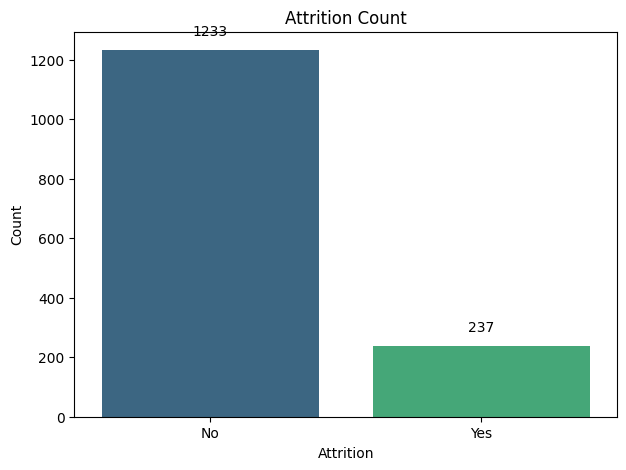

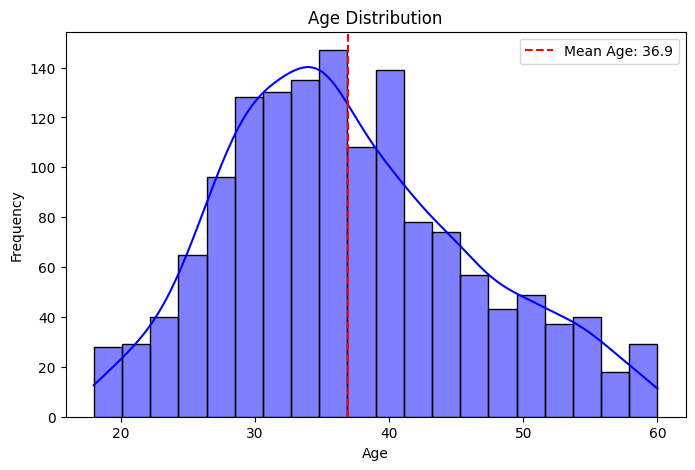

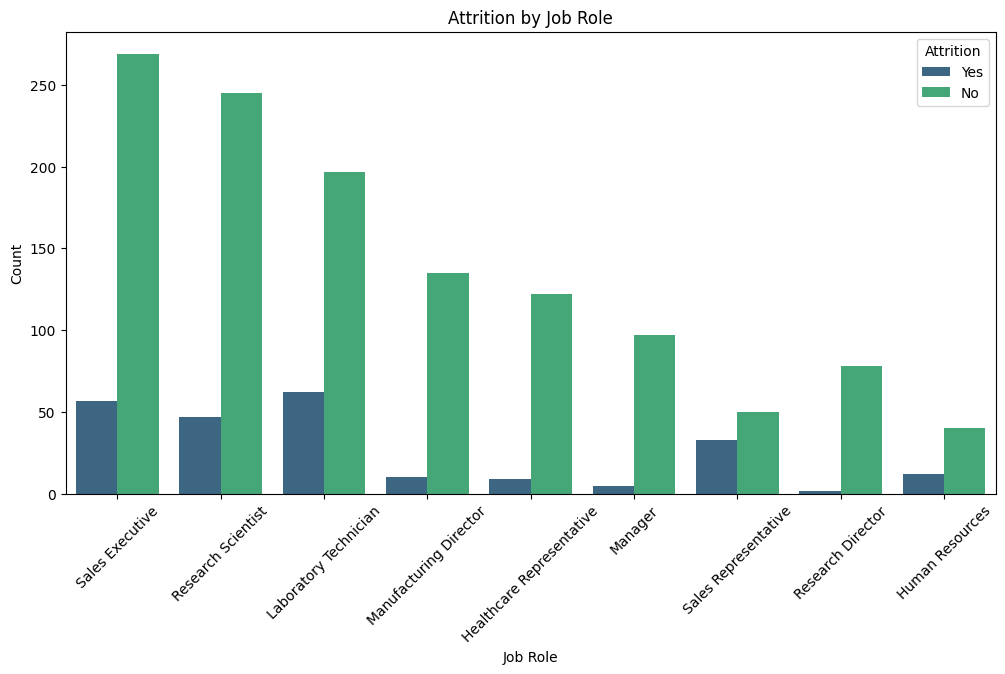

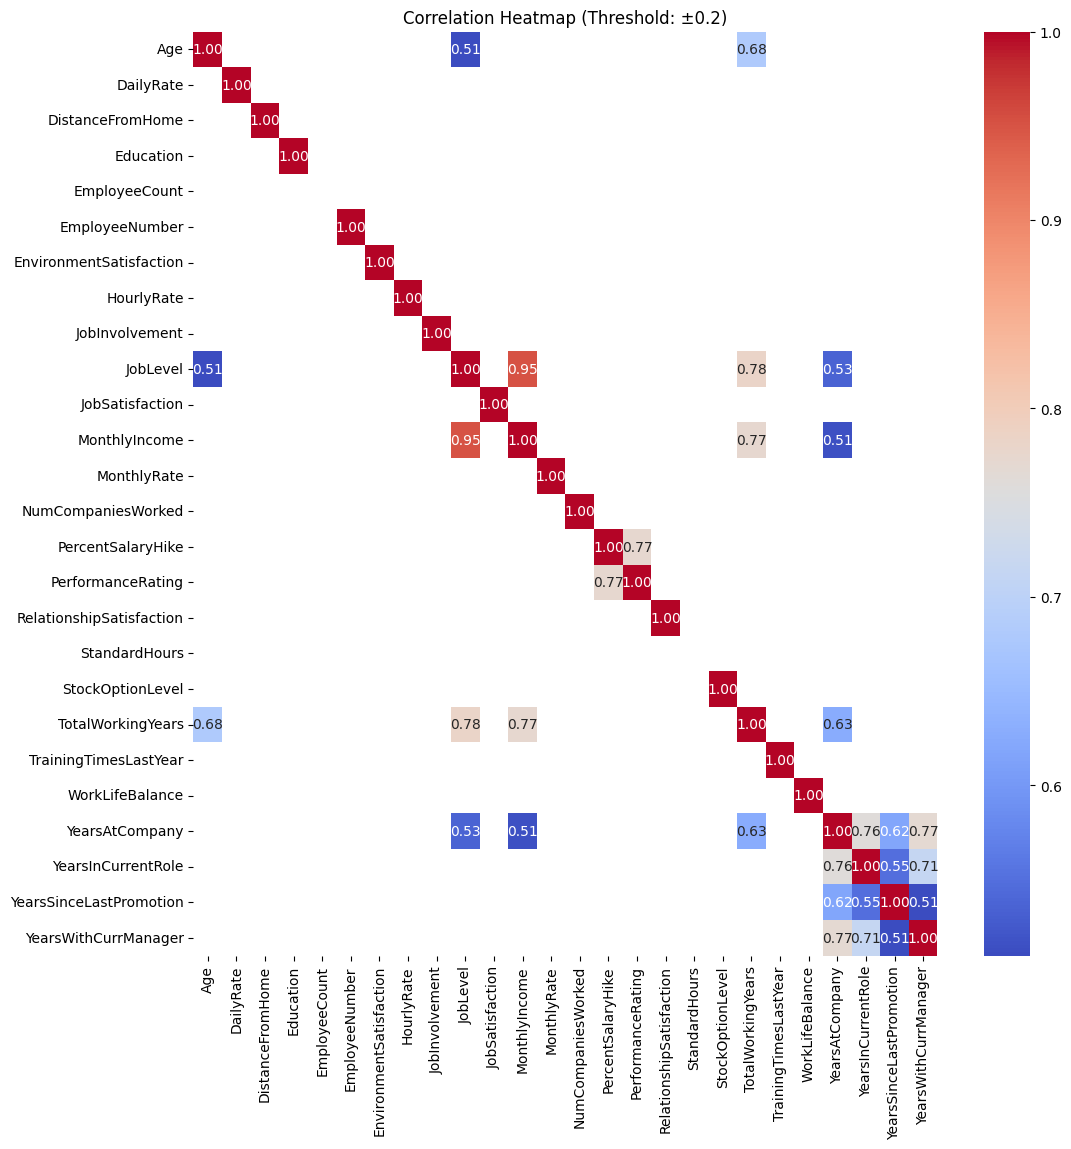

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Summary
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n")
df.info()
print("\n")
print(df.describe(), "\n")

# Checking Missing Values
print("Missing values in each column:")
print(df.isnull().sum(), "\n")

# Target Variable Distribution
attrition_counts = df['Attrition'].value_counts()
print("Attrition Counts:\n", attrition_counts, "\n")
print("Attrition Percentages:\n", df['Attrition'].value_counts(normalize=True) * 100, "\n")

# Visualization of Attrition Count
plt.figure(figsize=(7, 5))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='viridis')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
for i, v in enumerate(attrition_counts.values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)
plt.show()

# Visualization of Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', label=f"Mean Age: {df['Age'].mean():.1f}")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualization of Attrition by Job Role
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 12))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

# Filter correlations above 0.2 for clarity
sns.heatmap(
    correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)],
    annot=True,
    cmap='coolwarm',
    cbar=True,
    fmt=".2f"
)
plt.title('Correlation Heatmap (Threshold: ±0.2)')
plt.show()


## Feature Engineering and Data Splitting

Performs feature selection, encoding, scaling, and splitting of the dataset to prepare it for machine learning models.

The selected features are based on prior analysis, ensuring only the most relevant columns are retained for modeling. The target variable, `Attrition`, is encoded into binary format (`0`/`1`) to make it suitable for classification models. Categorical columns are set up for one-hot encoding, though none are currently encoded in this example.

To normalize the data, `DistanceFromHome` undergoes clipping and logarithmic transformation to handle outliers and skewness. Numerical features, including `Age` and `TotalWorkingYears`, are standardized using `StandardScaler` to ensure uniform scaling across features.

The dataset is then split into training and testing sets using `StratifiedShuffleSplit`. This approach preserves the balance of `Attrition` classes in both subsets, crucial for handling imbalanced datasets.


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import numpy as np

# Feature Selection Based on Heatmap Analysis
selected_features = [
    'Age', 
    'DistanceFromHome', 
    'JobLevel',  # OR MonthlyIncome (choose one based on preference)
    'TotalWorkingYears',  # OR YearsAtCompany (choose one based on preference)
    'JobSatisfaction', 
    'WorkLifeBalance', 
    'StockOptionLevel', 
    'YearsInCurrentRole', 
    'Attrition'
]

# Create a subset of the DataFrame with selected features
df = df[selected_features].copy()
print("Columns after selecting features:", df.columns)

# Encode target variable (Attrition)
encoder = LabelEncoder()
if 'Attrition' in df.columns:
    df['Attrition'] = encoder.fit_transform(df['Attrition'])
else:
    print("Attrition column not found!")

# One-hot encode categorical columns
categorical_columns = []  # Add any categorical columns that need one-hot encoding here
if categorical_columns:
    print("\nColumns before one-hot encoding:", df.columns)
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    print("\nColumns after one-hot encoding:", df.columns)

# Standardize numerical features
df['DistanceFromHome'] = df['DistanceFromHome'].clip(upper=20)
df['DistanceFromHome'] = np.log1p(df['DistanceFromHome'])  # Apply log transformation
scaler = StandardScaler()
numerical_features = ['Age', 'DistanceFromHome', 'TotalWorkingYears', 'YearsInCurrentRole']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Training and Testing dataset splits
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Use Stratified Split to preserve class balance
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Check the class distribution in train/test splits
print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True) * 100)
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True) * 100)

Columns after selecting features: Index(['Age', 'DistanceFromHome', 'JobLevel', 'TotalWorkingYears',
       'JobSatisfaction', 'WorkLifeBalance', 'StockOptionLevel',
       'YearsInCurrentRole', 'Attrition'],
      dtype='object')

Class distribution in y_train:
Attrition
0    83.843537
1    16.156463
Name: proportion, dtype: float64

Class distribution in y_test:
Attrition
0    84.013605
1    15.986395
Name: proportion, dtype: float64


## Standardization, SMOTE, and PCA

Standardizes the data, handles class imbalance using SMOTE, and applies PCA for dimensionality reduction, ensuring the dataset is ready for machine learning models.

The numerical features (`Age` and `DistanceFromHome`) are standardized using `StandardScaler` to normalize the data, ensuring consistency across all features. 

To address class imbalance, SMOTE (Synthetic Minority Oversampling Technique) is applied to the training data. This oversampling method generates synthetic examples for the minority class, improving model performance on imbalanced datasets.

Principal Component Analysis (PCA) is then applied to reduce the dimensionality of the dataset. 
- First, the cumulative explained variance is plotted to determine the number of components that capture at least 95% of the variance. This ensures the model retains most of the important information while reducing complexity.
- The training and testing data are transformed using PCA, with the selected number of components applied. 
- The shapes of the transformed datasets are printed to verify the reduction in dimensions.

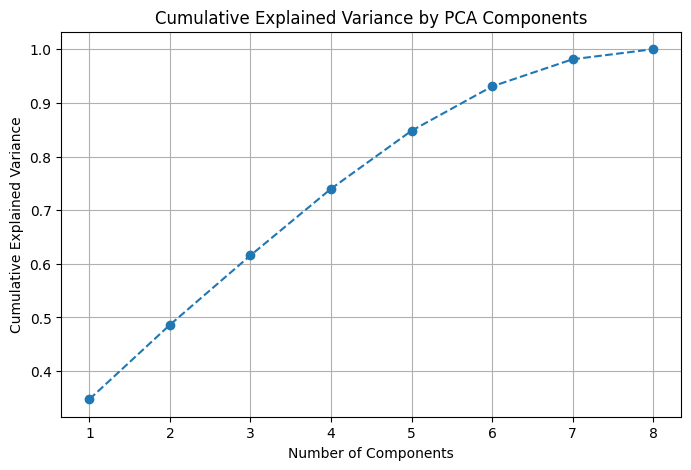

Number of components explaining 95% variance: 7
Shape of X_train after PCA: (1972, 7)
Shape of X_test after PCA: (294, 7)


In [4]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardization
scaler = StandardScaler()
numerical_features = ['Age', 'DistanceFromHome']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Feature and Target Variables
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE for Class Imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# PCA for Dimensionality Reduction
# Fit PCA on the resampled training data
pca = PCA()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)  # Ensure features are scaled
X_test_scaled = scaler.transform(X_test)  # Ensure consistent scaling for test data

X_train_pca = pca.fit_transform(X_train_resampled_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Determine the number of components explaining 95% variance
n_components = next(i for i, cumulative in enumerate(cumulative_variance) if cumulative >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_resampled_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Shape of X_train after PCA:", X_train_pca.shape)
print("Shape of X_test after PCA:", X_test_pca.shape)


## Standardization, SMOTE, and PCA with Pipeline

The pipeline is applied to the training data. SMOTE is used to balance the classes, followed by standardization and PCA to ensure the dataset is scaled and reduced in dimensions. The same transformations are applied to the test data for consistency.

A preprocessing pipeline automates scaling, balancing, and dimensionality reduction ensuring consistency between training and testing datasets.


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Train-Test Split
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the preprocessing pipeline
pipeline = Pipeline([
    ('scaling', StandardScaler()),  # Standardize numerical features
    ('smote', SMOTE(random_state=42)),  # Handle class imbalance with SMOTE
    ('pca', PCA(n_components=0.95))  # PCA to retain 95% variance
])

# Apply the pipeline to the training data
X_train_transformed, y_train_resampled = pipeline.named_steps['smote'].fit_resample(
    X_train,
    y_train
)
X_train_transformed = pipeline.named_steps['pca'].fit_transform(
    pipeline.named_steps['scaling'].fit_transform(X_train_transformed))

# Apply the same transformations to the test data
X_test_scaled = pipeline.named_steps['scaling'].transform(X_test)
X_test_transformed = pipeline.named_steps['pca'].transform(X_test_scaled)

# Print results
print("Shape of X_train after SMOTE and PCA:", X_train_transformed.shape)
print("Shape of X_test after PCA:", X_test_transformed.shape)


Shape of X_train after SMOTE and PCA: (1972, 7)
Shape of X_test after PCA: (294, 7)


## Flexible Preprocessing Pipeline with Standardization, SMOTE, and PCA

Training data undergoes scaling, SMOTE resampling, and PCA transformations sequentially.
Testing data is scaled and transformed using the same PCA model to ensure consistency with the training data.

The final shapes of the processed training and testing datasets confirm the successful application of the pipeline.


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Train-Test Split
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the preprocessing pipeline with flexibility
pipeline = Pipeline([
    ('scaling', StandardScaler()),  # Standardize numerical features
    ('smote', SMOTE(random_state=42)),  # Handle class imbalance with SMOTE
    ('pca', PCA(n_components=0.95))  # PCA to retain 95% variance
])

# Apply the pipeline to the training data
X_train_scaled = pipeline.named_steps['scaling'].fit_transform(X_train)
X_train_resampled, y_train_resampled = pipeline.named_steps['smote'].fit_resample(X_train_scaled, y_train)
X_train_transformed = pipeline.named_steps['pca'].fit_transform(X_train_resampled)

# Apply the same transformations to the test data
X_test_scaled = pipeline.named_steps['scaling'].transform(X_test)
X_test_transformed = pipeline.named_steps['pca'].transform(X_test_scaled)

# Print results
X_train_transformed.shape, X_test_transformed.shape

((1972, 7), (294, 7))

## Feature Selection with Random Forest

Uses a Random Forest classifier to determine the importance of features, enabling the selection of the top features for subsequent model training and evaluation.

A `RandomForestClassifier` is trained on the dataset to evaluate the relative importance of each feature in predicting the target variable (`Attrition`). The importance scores are extracted and visualized as a horizontal bar plot, highlighting the top 10 most influential features.

Based on the importance scores, the top 10 features are identified and selected. The training and testing datasets are then subsetted to include only these top features, reducing dimensionality and focusing on the most predictive attributes. Finally, the shapes of the subsetted datasets are displayed to verify the reduction.

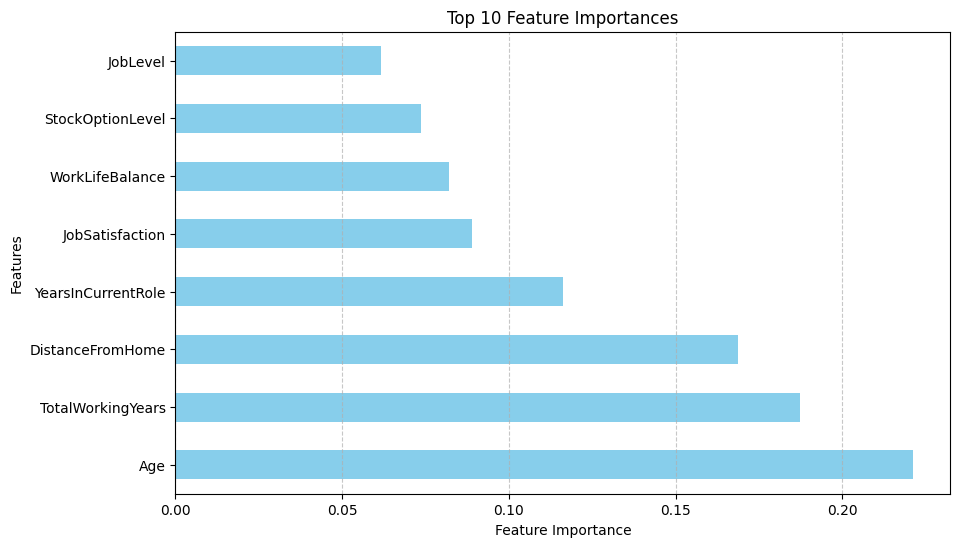



Top 10 Selected Features: ['Age', 'TotalWorkingYears', 'DistanceFromHome', 'YearsInCurrentRole', 'JobSatisfaction', 'WorkLifeBalance', 'StockOptionLevel', 'JobLevel']
Shape of X_train with top features: (1176, 8)
Shape of X_test with top features: (294, 8)


In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Train Random Forest to determine feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Select top 10 features
top_features = feature_importances.nlargest(10).index.tolist()
print("\n\nTop 10 Selected Features:", top_features)

# Subset the training and test datasets based on the top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Display the shape of the datasets after subsetting
print("Shape of X_train with top features:", X_train_top.shape)
print("Shape of X_test with top features:", X_test_top.shape)


## Model Training and Evaluation: Logistic Regression and SVM

Two machine learning models—Logistic Regression and Support Vector Machines (SVM)—using cross-validation on the selected top features. It also computes weighted contributions of each model for potential ensemble methods.

1. **Cross-Validation**:
   - Both Logistic Regression and SVM models are evaluated using 5-fold cross-validation on the training dataset.
   - The cross-validated accuracy scores provide an unbiased estimate of model performance.

2. **Model Weight Calculation**:
   - The accuracy scores from cross-validation are used to compute weights for the models.
   - The weights reflect the relative contribution of each model based on its performance.

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np

# Ensure selected features match the transformed dataset
selected_features = [feature for feature in top_features if feature in X_train.columns]
print("Final Selected Features:", selected_features)

# Cross-validate models using the selected feature set
print("\nCross-validated accuracy scores for models:")

# Logistic Regression Model
logistic_model = LogisticRegression(penalty='l2', C=0.1, random_state=42, max_iter=1000)
logistic_cv_scores = cross_val_score(logistic_model, X_train[selected_features], y_train, cv=5, scoring='accuracy')
logistic_accuracy = logistic_cv_scores.mean()
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")

# Support Vector Machine Model
svm_model = SVC(probability=False, class_weight="balanced", random_state=42, kernel='rbf')
svm_cv_scores = cross_val_score(svm_model, X_train[selected_features], y_train, cv=5, scoring='accuracy')
svm_accuracy = svm_cv_scores.mean()
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Combine model accuracies and compute weights
model_accuracies = {
    "Logistic Regression": logistic_accuracy,
    "SVM": svm_accuracy
}

# Calculate normalized weights for the models
total_accuracy = sum(model_accuracies.values())
weights = {model: acc / total_accuracy for model, acc in model_accuracies.items()}
print("\nModel Weights (based on accuracies):", weights)

# Train the final models on the full training set
logistic_model.fit(X_train[selected_features], y_train)
svm_model.fit(X_train[selected_features], y_train)

# Print confirmation of training
print("\nFinal Logistic Regression and SVM models trained with selected features.")


Final Selected Features: ['Age', 'TotalWorkingYears', 'DistanceFromHome', 'YearsInCurrentRole', 'JobSatisfaction', 'WorkLifeBalance', 'StockOptionLevel', 'JobLevel']

Cross-validated accuracy scores for models:
Logistic Regression Accuracy: 0.8435
SVM Accuracy: 0.7330

Model Weights (based on accuracies): {'Logistic Regression': np.float64(0.5350603305312518), 'SVM': np.float64(0.46493966946874815)}

Final Logistic Regression and SVM models trained with selected features.


## Weighted Ensemble Model: Logistic Regression and SVM

The Weighted ensemble leverages the strengths of both models to improve classification performance.

- The ensemble approach improves robustness by combining the strengths of Logistic Regression and SVM.
- Weighted probabilities offer flexibility in fine-tuning model behavior.
- The evaluation metrics and ROC curve provide a comprehensive view of the model's performance.


Cross-validated accuracy scores for models:
Logistic Regression Accuracy: 0.8435
SVM Accuracy: 0.8384

Model Weights (normalized): {'Logistic Regression': np.float64(0.5015190399924531), 'SVM': np.float64(0.49848096000754694)}

Customized Model Evaluation:
Accuracy: 0.8435
Precision: 0.5714
Recall: 0.0851
F1-Score: 0.1481
ROC AUC: 0.6744


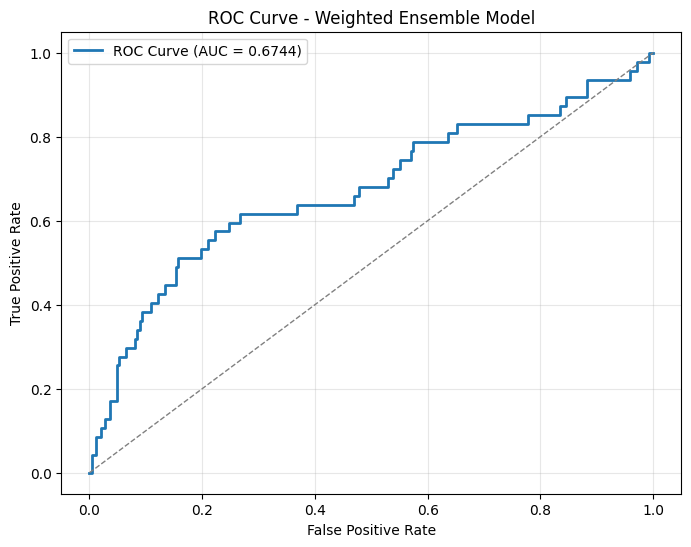

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Define models
logistic_model = LogisticRegression(penalty='l2', C=0.1, random_state=42, max_iter=1000)
svm_model = SVC(probability=True, random_state=42, kernel='rbf')

# Cross-validation scores
print("Cross-validated accuracy scores for models:")
logistic_cv_scores = cross_val_score(logistic_model, X_train[selected_features], y_train, cv=5, scoring='accuracy')
logistic_accuracy = logistic_cv_scores.mean()
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")

svm_cv_scores = cross_val_score(svm_model, X_train[selected_features], y_train, cv=5, scoring='accuracy')
svm_accuracy = svm_cv_scores.mean()
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Calculate model weights based on cross-validation accuracies
model_accuracies = {
    "Logistic Regression": logistic_accuracy,
    "SVM": svm_accuracy
}
total_accuracy = sum(model_accuracies.values())
weights = {model: acc / total_accuracy for model, acc in model_accuracies.items()}
print("\nModel Weights (normalized):", weights)

# Train models on the full training set
logistic_model.fit(X_train[selected_features], y_train)
svm_model.fit(X_train[selected_features], y_train)

# Weighted predictions
def weighted_predictions(models, weights, X_test):
    weighted_proba = np.zeros((X_test.shape[0],))
    for model_name, model in models.items():
        model_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class
        weighted_proba += weights[model_name] * model_proba
    return weighted_proba

# Combine trained models
trained_models = {
    "Logistic Regression": logistic_model,
    "SVM": svm_model
}

# Generate weighted probabilities and final predictions
weighted_proba = weighted_predictions(trained_models, weights, X_test[selected_features])
final_predictions = (weighted_proba >= 0.5).astype(int)  # Threshold set to 0.5 for binary classification

# Evaluate model performance
print("\nCustomized Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, final_predictions):.4f}")
print(f"Precision: {precision_score(y_test, final_predictions):.4f}")
print(f"Recall: {recall_score(y_test, final_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, final_predictions):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, weighted_proba):.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, weighted_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, weighted_proba):.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color='gray', linewidth=1)
plt.title("ROC Curve - Weighted Ensemble Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Model Evaluation and Weighted Ensemble Analysis

Evaluates individual models (Logistic Regression and SVM) and the combined weighted ensemble model. It provides a comprehensive analysis of the models' performance using multiple metrics and visualizations.

1. **Individual Model Evaluation**:
   - The `evaluate_model` function calculates key metrics for a given model: Accuracy, Precision, Recall, F1-Score, and ROC AUC.
   - It also generates ROC and Precision-Recall curves to visualize the model's performance at various thresholds.
   - Logistic Regression is evaluated with a decision threshold of 0.3, emphasizing recall.

2. **Weighted Predictions**:
   - The `weighted_predictions` function combines the predictions of Logistic Regression and SVM using their calculated weights.
   - Weighted probabilities are generated for each test instance, reflecting the contributions of both models.

3. **Combined Model Evaluation**:
   - The combined weighted ensemble is evaluated using the same metrics as individual models.
   - Final predictions are made using a default threshold of 0.5.

4. **Visualizations**:
   - ROC curves for both individual models and the combined model are plotted, showing the trade-off between sensitivity and specificity.
   - Precision-Recall curves for individual models provide insights into performance under imbalanced data conditions.

### Outcomes:
- **Individual Models**:
  - Evaluation highlights the strengths and weaknesses of Logistic Regression and SVM independently.
- **Combined Model**:
  - Weighted predictions improve robustness by leveraging the strengths of both models.
  - Evaluation metrics provide a quantitative comparison of model effectiveness.
- **Visual Insights**:
  - ROC and Precision-Recall curves offer a deeper understanding of model performance at different thresholds.

Model: Logistic Regression
Accuracy: 0.827
Precision: 0.447
Recall: 0.362
F1-Score: 0.400
ROC AUC: 0.666




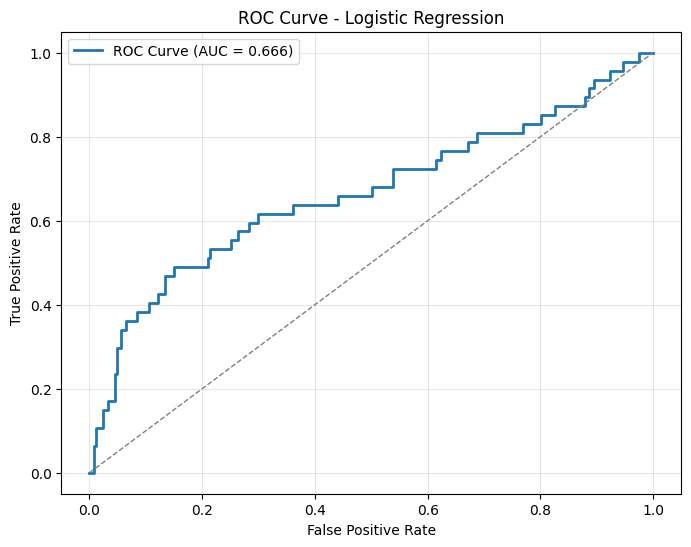

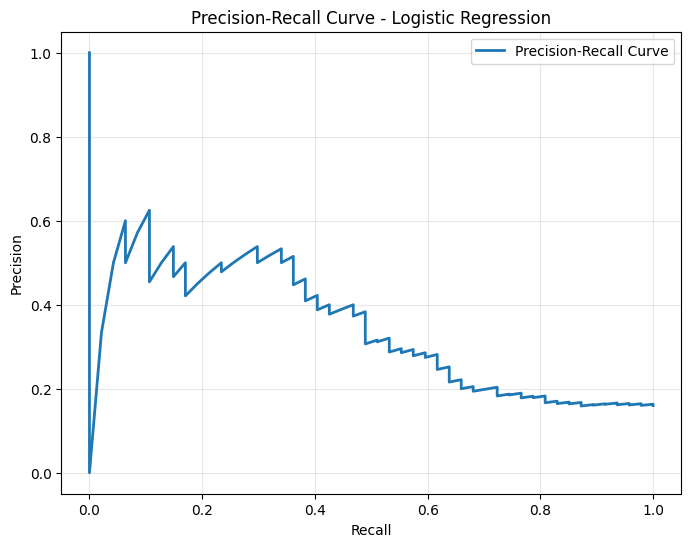

Model: SVM
Accuracy: 0.837
Precision: 0.444
Recall: 0.085
F1-Score: 0.143
ROC AUC: 0.710




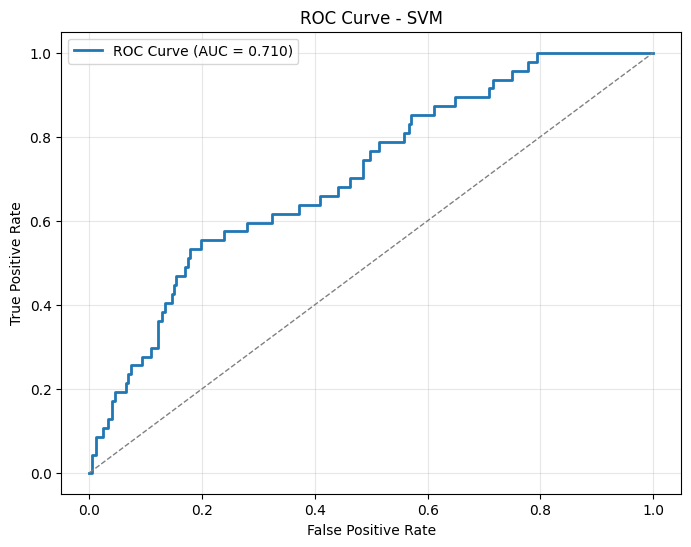

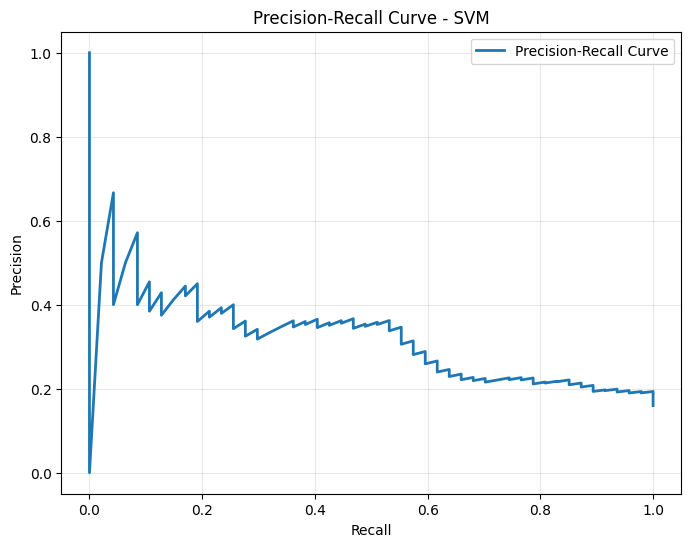



Combined Model Evaluation:
Accuracy: 0.844
Precision: 0.571
Recall: 0.085
F1-Score: 0.148
ROC AUC: 0.674


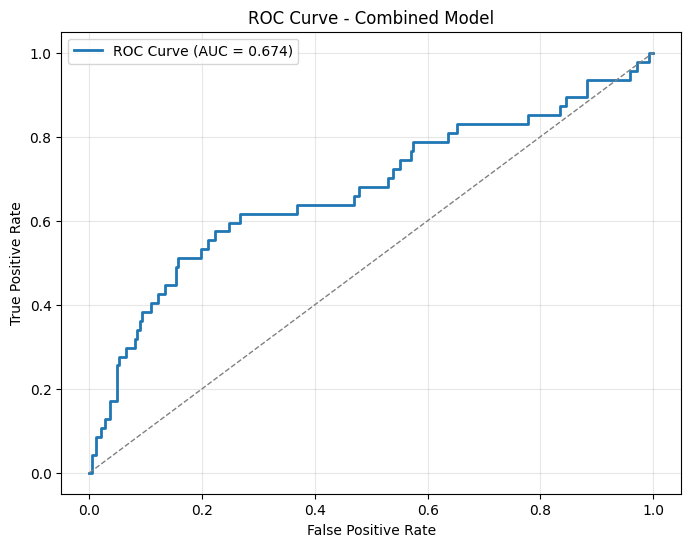

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to Evaluate a Single Model
def evaluate_model(model, X_test, y_test, model_name, threshold=0.5):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class
    y_pred = (y_pred_proba >= threshold).astype(int)  # Apply decision threshold

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=1):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")
    print("\n")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})", linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", linewidth=1)
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label="Precision-Recall Curve", linewidth=2)
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

# Evaluate Individual Models
evaluate_model(logistic_model, X_test[selected_features], y_test, "Logistic Regression", threshold=0.3)
evaluate_model(svm_model, X_test[selected_features], y_test, "SVM")

# Function to Calculate Weighted Predictions
def weighted_predictions(models, weights, X_test):
    weighted_proba = np.zeros((X_test.shape[0],))
    for model_name, model in models.items():
        model_proba = model.predict_proba(X_test)[:, 1]
        weighted_proba += weights[model_name] * model_proba
    return weighted_proba

# Combine Model Predictions
trained_models = {
    "Logistic Regression": logistic_model,
    "SVM": svm_model
}

weighted_proba = weighted_predictions(trained_models, weights, X_test[selected_features])
final_predictions = (weighted_proba >= 0.5).astype(int)  # Default threshold of 0.5

# Evaluate Combined Model
print("\n\nCombined Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, final_predictions):.3f}")
print(f"Precision: {precision_score(y_test, final_predictions):.3f}")
print(f"Recall: {recall_score(y_test, final_predictions):.3f}")
print(f"F1-Score: {f1_score(y_test, final_predictions):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, weighted_proba):.3f}")

# Plot ROC curve for the Combined Model
fpr, tpr, _ = roc_curve(y_test, weighted_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, weighted_proba):.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", linewidth=1)
plt.title("ROC Curve - Combined Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Model Comparison: Accuracy and ROC AUC

Compares the performance of three models: Logistic Regression, SVM, and a Combined Weighted Ensemble. The comparison is based on two metrics:
- **Accuracy**: Measures the proportion of correct predictions.
- **ROC AUC**: Represents the area under the ROC curve, reflecting the model's ability to distinguish between classes.

**Metrics Calculation**:
   - For Logistic Regression and SVM, probabilities are converted to predictions using a decision threshold of 0.5.
   - Accuracy and ROC AUC are computed for each model, including the combined model.

The best-performing model based on ROC AUC is highlighted in red.

The visualization helps determine the most effective model for predicting attrition based on both accuracy and discriminative power.


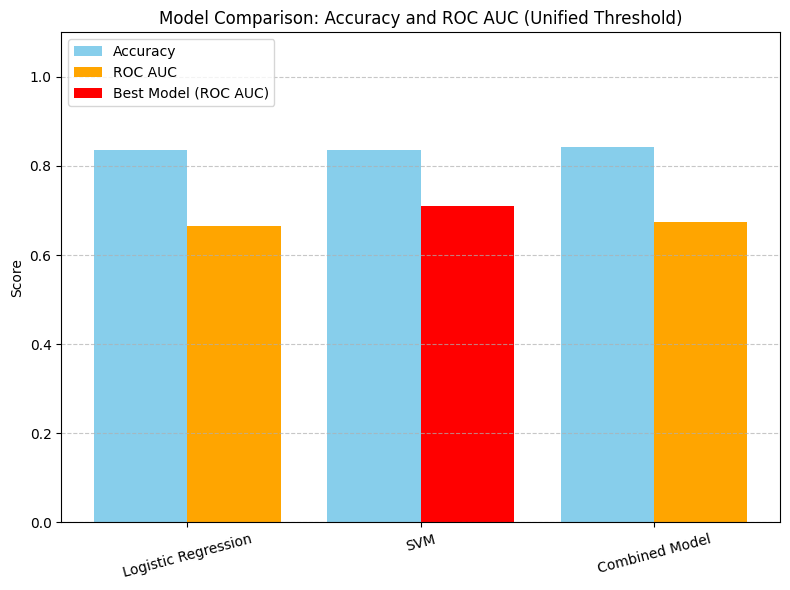

In [11]:
# Recompute ROC AUC and Accuracy for All Models
model_metrics = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, (logistic_model.predict_proba(X_test[selected_features])[:, 1] >= 0.5).astype(int)),
        "ROC AUC": roc_auc_score(y_test, logistic_model.predict_proba(X_test[selected_features])[:, 1])
    },
    "SVM": {
        "Accuracy": accuracy_score(y_test, (svm_model.predict_proba(X_test[selected_features])[:, 1] >= 0.5).astype(int)),
        "ROC AUC": roc_auc_score(y_test, svm_model.predict_proba(X_test[selected_features])[:, 1])
    },
    "Combined Model": {
        "Accuracy": accuracy_score(y_test, (weighted_proba >= 0.5).astype(int)),
        "ROC AUC": roc_auc_score(y_test, weighted_proba)
    }
}

# Extract Metrics for Plotting
models = list(model_metrics.keys())
accuracy_scores = [model_metrics[model]["Accuracy"] for model in models]
roc_auc_scores = [model_metrics[model]["ROC AUC"] for model in models]

# Plot Metrics
plt.figure(figsize=(8, 6))
x_indices = np.arange(len(models))

# Plot Bars
plt.bar(x_indices - 0.2, accuracy_scores, width=0.4, label="Accuracy", color='skyblue', align='center')
plt.bar(x_indices + 0.2, roc_auc_scores, width=0.4, label="ROC AUC", color='orange', align='center')

# Highlight Best Model Based on ROC AUC
best_model_index = np.argmax(roc_auc_scores)
plt.bar(x_indices[best_model_index] + 0.2, roc_auc_scores[best_model_index], width=0.4, color='red', label="Best Model (ROC AUC)", align='center')

# Aesthetic Adjustments
plt.xticks(x_indices, models, rotation=15)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy and ROC AUC (Unified Threshold)")
plt.ylim(0, 1.1)
plt.legend(loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## LIME: Local Interpretable Model-Agnostic Explanations

Interprets the predictions of a machine learning model. It explains the influence of specific features on the model's prediction for a single instance.

**LIME Initialization**:
   - `LimeTabularExplainer` is initialized using the training dataset and its feature names.
   - The `class_names` parameter defines the target classes ('No Attrition' and 'Attrition') for better interpretability.

**Instance Explanation**:
   - An explanation is generated for a specific row of the test dataset (`instance_index` = 0 by default).
   - The `predict_fn` parameter specifies the model's probability prediction function, in this case, `rf_model.predict_proba`.

3. **Output and Visualization**:
   - The LIME explanation is displayed in the notebook, showing the top 5 most influential features for the selected instance.

LIME provides insight into which features influenced the model's decision for a specific instance, making it easier to understand the predictions. The instance index can be adjusted to analyze different rows in the dataset.


In [12]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME Tabular Explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Pass training data as a NumPy array
    feature_names=X_train.columns,  # List of feature names
    class_names=['No Attrition', 'Attrition'],  # Class labels
    mode='classification'  # For classification problems
)

# Explain a specific instance (first row of test data)
instance_index = 0  # Adjust this index to analyze a different instance
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[instance_index].values,  # Instance to explain (as NumPy array)
    predict_fn=rf_model.predict_proba,  # Prediction function of the trained model
    num_features=5  # Number of top features to display in the explanation
)

# Display LIME explanation in the notebook
lime_exp.show_in_notebook()

# Save explanation to an HTML file for sharing or further review
lime_exp.save_to_file('lime_explanation.html')

print(f"LIME explanation for instance {instance_index} saved as 'lime_explanation.html'")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


LIME explanation for instance 0 saved as 'lime_explanation.html'


## Confusion Matrix Analysis

### Confusion Matrix Results
| Metric                | Value |
|-----------------------|-------|
| **True Negatives (TN)** | 148   |
| **False Positives (FP)** | 99    |
| **False Negatives (FN)** | 17    |
| **True Positives (TP)** | 30    |

### Feasibility Check
1. **Dataset Size**:
   - Total predictions:  
     TN + FP + FN + TP = 148 + 99 + 17 + 30 = 294  
     Matches the size of the test set, confirming feasibility.

2. **Class Imbalance**:
   - Positive class (Attrition): TP + FN = 30 + 17 = 47  
     Proportion: 47 / 294 ≈ 16%, consistent with expectations.
   - Negative class (No Attrition): TN + FP = 148 + 99 = 247  
     Proportion: 247 / 294 ≈ 84%, as expected for an imbalanced dataset.

3. **Model Behavior**:
   - **High False Positives (FP = 99)**:
     - Indicates the model tends to overpredict attrition cases, likely due to the low decision threshold (0.16).
   - **Low False Negatives (FN = 17)**:
     - The model successfully identifies most employees who actually left, prioritizing recall.

### Key Metrics
| Metric       | Formula                               | Value  |
|--------------|---------------------------------------|--------|
| **Accuracy** | (TN + TP) / (TN + TP + FN + FP)       | (148 + 30) / 294 ≈ 60.5% |
| **Precision** | TP / (TP + FP)                       | 30 / (30 + 99) ≈ 23.3% |
| **Recall**    | TP / (TP + FN)                       | 30 / (30 + 17) ≈ 63.8% |
| **F1-Score**  | 2 * (Precision * Recall) / (Precision + Recall) | ≈ 34.2% |

### Feasibility Conclusion
- The confusion matrix results are feasible based on the dataset distribution and threshold of 0.16.
- The model prioritizes **recall** (63.8%) at the expense of **precision** (23.3%).
- Improvements could include adjusting the decision threshold or using ensemble methods to balance precision and recall.


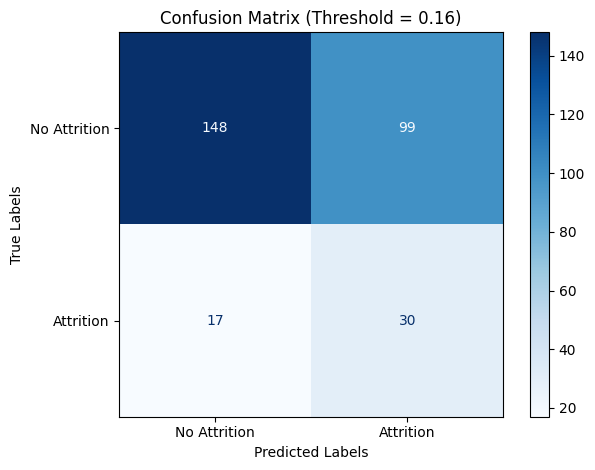

True Negatives (TN): 148
False Positives (FP): 99
False Negatives (FN): 17
True Positives (TP): 30


In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions for Logistic Regression using a custom threshold
threshold = 0.16  # Adjust this threshold as needed
logistic_predictions = (logistic_model.predict_proba(X_test[selected_features])[:, 1] >= threshold).astype(int)

# Compute confusion matrix
cm_logistic = confusion_matrix(y_test, logistic_predictions)

# Display confusion matrix
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=['No Attrition', 'Attrition'])
disp_logistic.plot(cmap='Blues', colorbar=True)
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)  # Remove grid for cleaner visualization
plt.tight_layout()
plt.show()

# Print numerical values for the confusion matrix
tn, fp, fn, tp = cm_logistic.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


## Logistic Regression with Threshold Adjustment

Refines the performance of a logistic regression model by optimizing the decision threshold to achieve a balance between precision, recall, and F1-Score.

**Threshold Adjustment**:
   - Thresholds ranging from 0.1 to 0.9 are evaluated.
   - For each threshold:
     - Predictions are generated based on the threshold.
     - Precision, recall, and F1-Score are calculated.
   - Results are stored for analysis and plotted for visualization.
   - The threshold yielding the highest F1-Score is selected as the optimal threshold.

- **Optimal Threshold**:
  - Identified based on the highest F1-Score.

The threshold adjustment allows balancing the model's ability to identify attrition cases (recall) against minimizing false positives (precision). <br>
The confusion matrix offers interpretability, showing the trade-off between identifying attrition cases and avoiding unnecessary false positives.


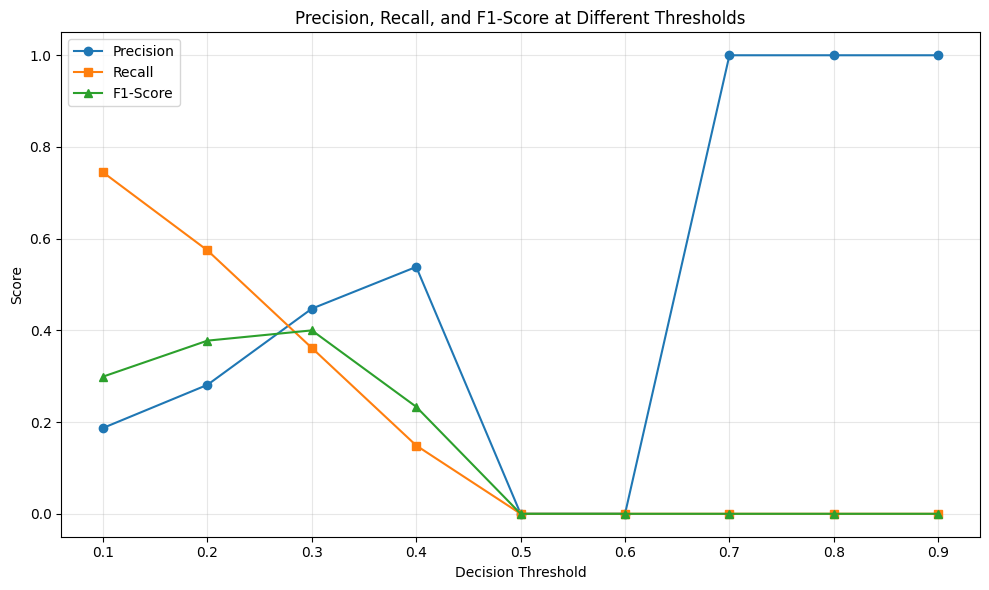

Optimal Threshold: 0.30
Precision: 0.447
Recall: 0.362
F1-Score: 0.400


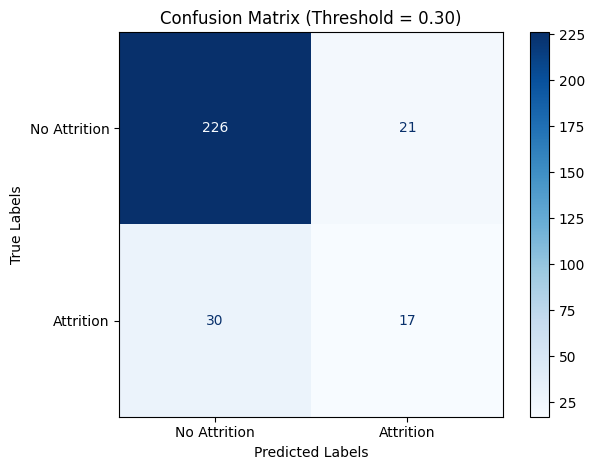

True Negatives (TN): 226
False Positives (FP): 21
False Negatives (FN): 30
True Positives (TP): 17


In [14]:
from sklearn.linear_model import LogisticRegression

# Re-train the logistic model if necessary
logistic_model = LogisticRegression(penalty='l2', C=0.1, random_state=42, max_iter=1000)
logistic_model.fit(X_train[selected_features], y_train)

# Proceed with threshold adjustment
thresholds = np.linspace(0.1, 0.9, 9)

precision_scores = []
recall_scores = []
f1_scores = []
threshold_results = {}

for threshold in thresholds:
    logistic_predictions = (logistic_model.predict_proba(X_test[selected_features])[:, 1] >= threshold).astype(int)
    precision = precision_score(y_test, logistic_predictions, zero_division=1)
    recall = recall_score(y_test, logistic_predictions)
    f1 = f1_score(y_test, logistic_predictions)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    threshold_results[threshold] = {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label="Precision", marker='o')
plt.plot(thresholds, recall_scores, label="Recall", marker='s')
plt.plot(thresholds, f1_scores, label="F1-Score", marker='^')
plt.title("Precision, Recall, and F1-Score at Different Thresholds")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Optimal Threshold
optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_metrics = threshold_results[optimal_threshold]
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Precision: {optimal_metrics['Precision']:.3f}")
print(f"Recall: {optimal_metrics['Recall']:.3f}")
print(f"F1-Score: {optimal_metrics['F1-Score']:.3f}")

# Confusion Matrix for Optimal Threshold
logistic_predictions_optimal = (logistic_model.predict_proba(X_test[selected_features])[:, 1] >= optimal_threshold).astype(int)
cm_optimal = confusion_matrix(y_test, logistic_predictions_optimal)
disp_optimal = ConfusionMatrixDisplay(confusion_matrix=cm_optimal, display_labels=['No Attrition', 'Attrition'])
disp_optimal.plot(cmap='Blues', colorbar=True)
plt.title(f"Confusion Matrix (Threshold = {optimal_threshold:.2f})")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.grid(False)
plt.tight_layout()
plt.show()

# Print numerical values for the confusion matrix
tn, fp, fn, tp = cm_optimal.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

## Predicting Attrition for a Hypothetical Employee

**Predicted Likelihood of Attrition**: 62.39%
  - This indicates a significant risk of attrition for the given employee profile.

### Insights:
- The high likelihood highlights the impact of features such as long commute distance, low job satisfaction, and poor work-life balance on attrition probability.


In [15]:
# Example of an at-risk employee scenario
dummy_employee1 = pd.DataFrame({
    "Age": [22],
    "DistanceFromHome": [29],
    "JobSatisfaction": [1],
    "WorkLifeBalance": [1],
    "StockOptionLevel": [0],
    "YearsInCurrentRole": [0],
    "BusinessTravel_Travel_Frequently": [1],
    "BusinessTravel_Travel_Rarely": [0],
    "JobRole_Sales_Representative": [1],
    "JobRole_Laboratory_Technician": [0],
    "TotalWorkingYears": [1],
    "JobLevel": [1]
})

# Add any missing columns and align features
for feature in selected_features:
    if feature not in dummy_employee1.columns:
        dummy_employee1[feature] = 0
dummy_employee1 = dummy_employee1[selected_features]

# Predict attrition likelihood
attrition_probability1 = logistic_model.predict_proba(dummy_employee1)[:, 1][0]
attrition_likelihood1 = attrition_probability1 * 100

# Output result
print(f"Predicted likelihood of attrition: {attrition_likelihood1:.2f}%")


Predicted likelihood of attrition: 62.39%


Age                   0.215445
TotalWorkingYears     0.193788
DistanceFromHome      0.166263
YearsInCurrentRole    0.116179
JobSatisfaction       0.095017
WorkLifeBalance       0.081860
StockOptionLevel      0.072402
JobLevel              0.059046
dtype: float64


<Axes: title={'center': 'Feature Importance'}>

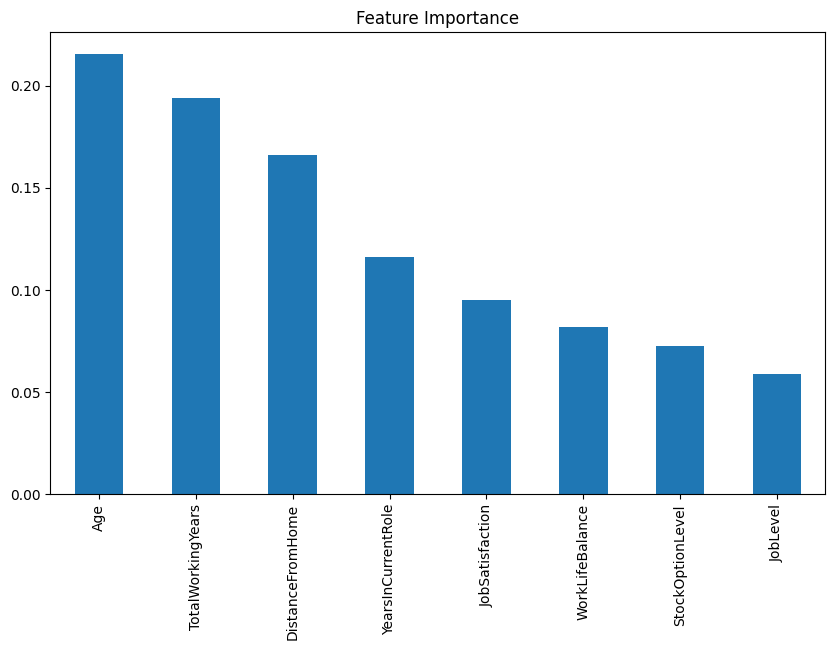

In [16]:
# Check feature importance in Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[selected_features], y_train)

# Extract feature importances
importances = pd.Series(rf_model.feature_importances_, index=selected_features).sort_values(ascending=False)
print(importances)

# Plot the feature importances
importances.plot(kind='bar', figsize=(10, 6), title="Feature Importance")
